In [88]:
import numpy as np
import astropy
from astropy.io import ascii
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import pylab
from pylab import plot
from astropy.cosmology import WMAP9 as cosmo
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'
%config InlineBackend.figure_format='retina'

In [89]:
print 'Reading files'
w = ascii.read('wen.csv') 
r = fits.open('redmapper.fits') 
r = r[1].data
print len(w)
print len(r)

Reading files
132684
26111


In [90]:
print 'catalog with values RA and DEC'
cw = SkyCoord(ra = w['RAJ2000']*u.degree, dec = w['DEJ2000']*u.degree) 
cr = SkyCoord(ra = r['RA']*u.degree, dec = r['DEC']*u.degree) 

catalog with values RA and DEC


Histograms


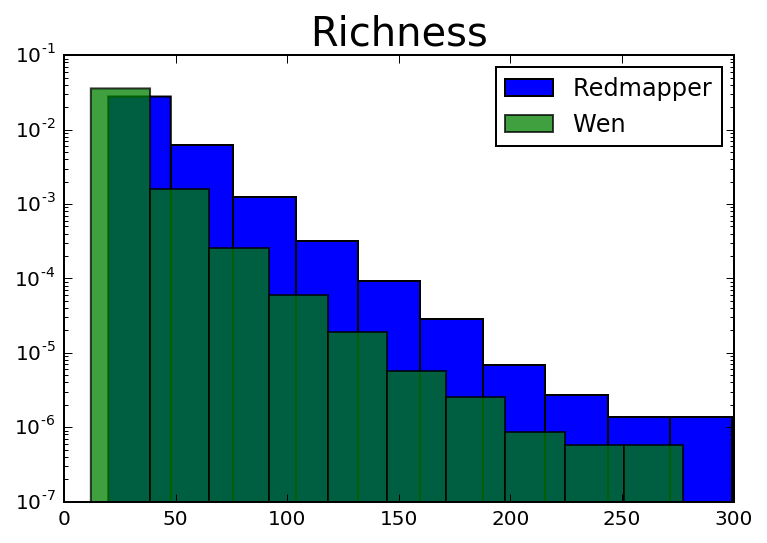

In [91]:
print 'Histograms'
h_r = plt.hist((r['LAMBDA']), normed=True, log = True, label = 'Redmapper')
h_r = plt.hist((w['RL*']), normed=True, log = True, label = 'Wen', alpha=0.75)
plt.legend()
plt.title('Richness', fontsize = '20')

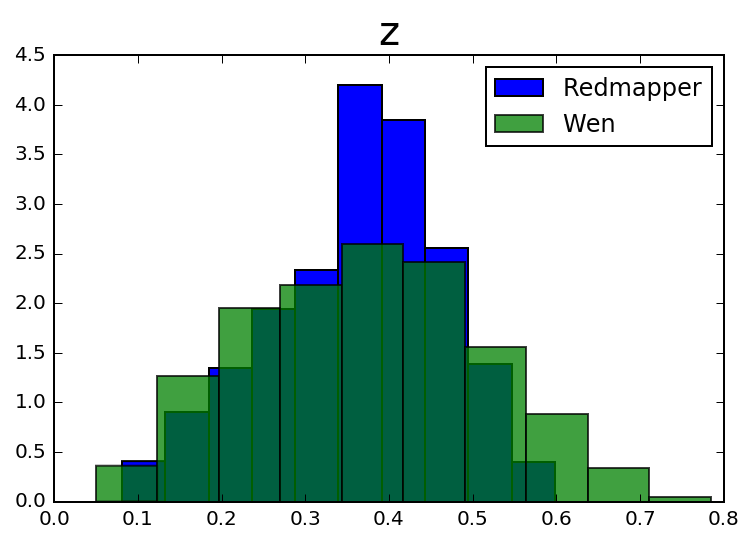

In [92]:
h_z = plt.hist(r['z_lambda'], normed=True, label = 'Redmapper')
h_z = plt.hist(w['zph'], normed=True, label = 'Wen', alpha=0.75)
plt.legend()
plt.title('z', fontsize='20')

In [93]:
print("\033[43;30mSky - Code, Histograms, Plots and Macth\033[m")
# indices do tamanho do catalogo originais?    
print 'match to catalog sky'
idwx, d2dw, d3d = cw.match_to_catalog_sky(cr) 
print 'Match Wen em relacao ao Redmapper =',len(idwx)
print idwx, d2dw, d3d 

print 'match to catalog sky'
idrx, d2dr, d3d = cr.match_to_catalog_sky(cw) 
print 'Match Redmapper em relacao ao Wen =',len(idrx)
print idrx, d2dr, d3d 

Sky - Code, Histograms, Plots and Macth
match to catalog sky
Match Wen em relacao ao Redmapper = 132684
[ 3323  9032  3202 ...,  9829  2359 23322] [u'0d04m03.6219s' u'0d00m00.0182s' u'0d32m26.5436s' ..., u'0d13m51.3945s'
 u'0d09m23.3753s' u'0d18m22.1316s'] [  1.18111231e-03   8.82671400e-08   9.43707448e-03 ...,   4.03071155e-03
   2.73131982e-03   5.34327843e-03]
match to catalog sky
Match Redmapper em relacao ao Wen = 26111
[102163 107605  76974 ...,  66087  49087  38461] [u'0d00m00.0109s' u'0d00m00.0063s' u'0d00m00.0168s' ..., u'0d05m44.4567s'
 u'0d12m53.5536s' u'0d10m57.2354s'] [  5.29359756e-08   3.05118346e-08   8.15707840e-08 ...,   1.66997298e-03
   3.75029169e-03   3.18636589e-03]


In [94]:
#plt.hist(d2dw, bins=100000)
#plt.xlabel('d2d')
#plt.xlim(0,0.0004)
#plt.ylim(0,10)

(0, 10)

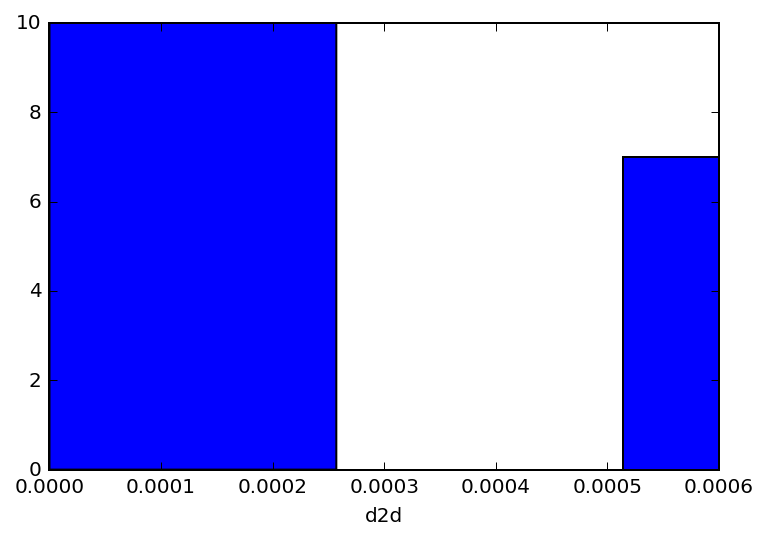

In [95]:
plt.hist(d2dr, bins=2000)
plt.xlabel('d2d')
plt.xlim(0,0.0006)
plt.ylim(0, 10)

In [96]:
print len(np.unique(idwx))
print len(np.unique(idrx))
print len(idrx[d2dr<0.0004*u.deg])
print len(idwx[d2dw<0.0004*u.deg])

25724
25434
16168
16168


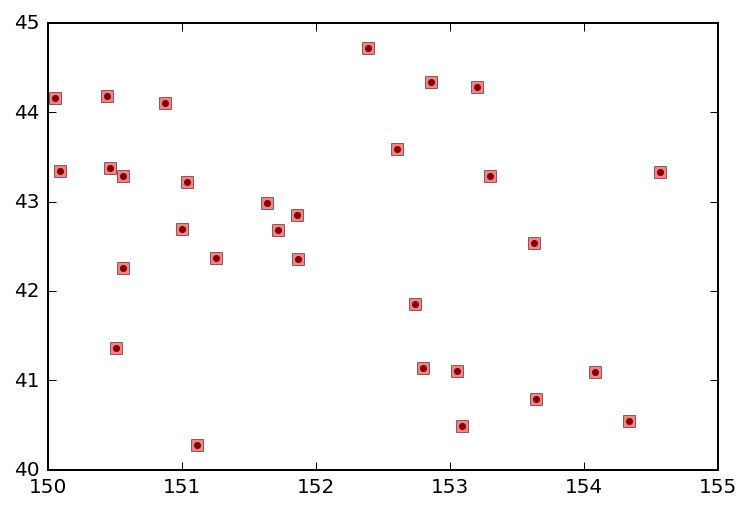

In [97]:
from IPython.html.widgets import interact, fixed

def test_radius(radius=0.004):
    uidrx = idrx[d2dr<radius*u.deg]
    uidwx = idwx[d2dw<radius*u.deg]
    #print uidrx
    #print uidwx
    
    plt.plot(cw.ra[uidrx], cw.dec[uidrx], 'k.')
    plt.plot(cr.ra[uidwx], cr.dec[uidwx], 'rs', alpha=0.5)
    plt.xlim(150, 155)
    plt.ylim(40, 45)
    
interact(test_radius, radius=(0.001, 0.2, 0.01));

Plot ra x dec - sky


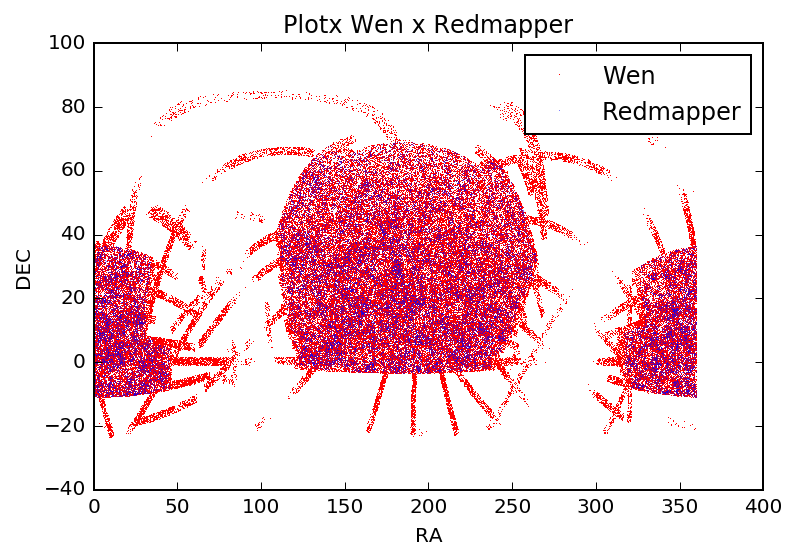

In [98]:
print 'Plot ra x dec - sky'
ra_w = w['RAJ2000']*u.deg
dec_w = w['DEJ2000']*u.deg

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(ra_w, dec_w, 'r,', label = 'Wen')

ra_r = r['RA']*u.deg 
dec_r = r['DEC']*u.deg

ax.plot(ra_r, dec_r, 'b,', label = 'Redmapper', alpha=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')

ax.legend(numpoints=1)
plt.title('Plotx Wen x Redmapper')
#savefig('Plot-Sky.png')

In [99]:
print 'Objects around to catalog sky'
idxcw, idxcr, d2d, d3d = cr.search_around_sky(cw, 4*u.arcmin)

Objects around to catalog sky


(0, 10)

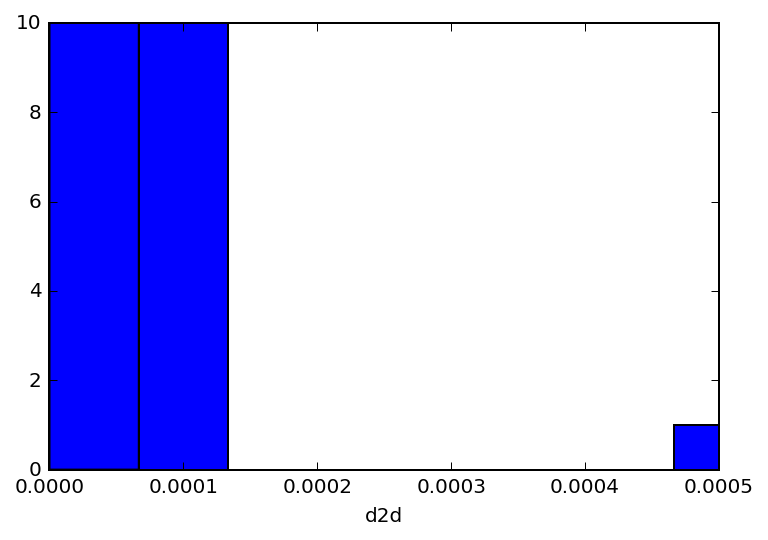

In [100]:
plt.hist(d2d, bins=1000)
plt.xlabel('d2d')
plt.xlim(0,0.0005)
plt.ylim(0,10)

In [101]:
print len(np.unique(idxcw))
print len(np.unique(idxcr))
print len(idxcw[d2d<0.0002*u.deg])
print len(idxcr[d2d<0.0002*u.deg])

objw = idxcw[d2d<0.0002*u.deg]
objr = idxcr[d2d<0.0002*u.deg]

o_w = w[objw]
o_r = r[objr]

print len(o_w)
print len(o_r)

27084
23298
16168
16168
16168
16168


In [102]:
print 'Mean and standard deviation'

delta_ra = o_w['RAJ2000'] - o_r['RA'] 
delta_dec = o_w['DEJ2000'] - o_r['DEC'] 

media_ra = delta_ra.mean()
media_dec = delta_dec.mean()

sigma_ra = delta_ra.std()
sigma_dec = delta_dec.std()

print 'Media RA =',media_ra
print 'Media DEC =',media_dec 
print 'Desvio Padrao RA =',sigma_ra
print 'Desvio Padrao DEC =',sigma_dec

Mean and standard deviation
Media RA = 2.69009126281e-08
Media DEC = -2.57945601759e-08
Desvio Padrao RA = 6.29785657289e-06
Desvio Padrao DEC = 3.70388640041e-06


In [103]:
print 'Completeness - sky'
Red_w = w['zph']
Red_r = r['Z_LAMBDA']
Red_w_m = o_w['zph']
Red_r_m = o_r ['Z_LAMBDA']
Completeness_w = (Red_w_m[0])/(Red_w[0])
Completeness_r = (Red_r_m[0])/(Red_r[0])
Completeness_w_r = (Red_w_m[0]/Red_r[0])
Completeness_r_w = (Red_r_m[0])/(Red_w[0])
print Completeness_w, Completeness_r, Completeness_w_r, Completeness_r_w

Completeness - sky
1.33124018838 1.80683 1.78845094062 1.34491939185


Histograma com os valores do Redshift
Wen = 132684 , Match Wen = 16168 ,Redmapper = 26111 ,Match Redmapper = 16168


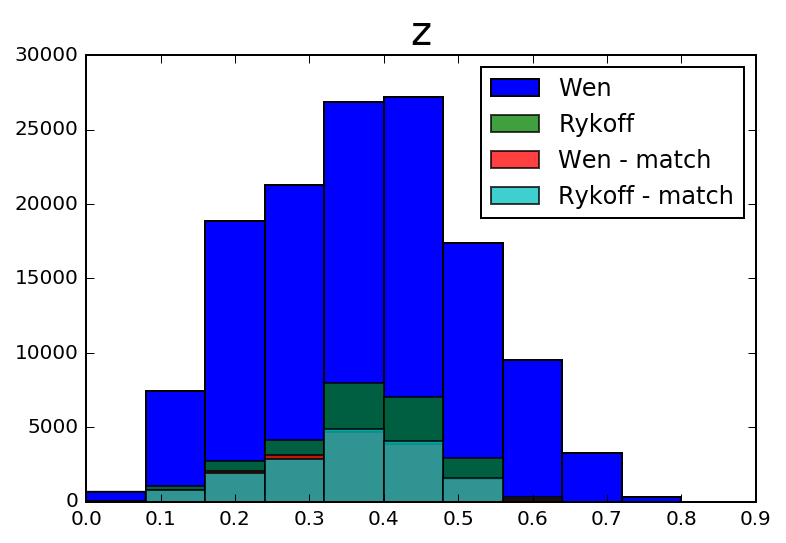

In [104]:
print 'Histograma com os valores do Redshift'

R_W = len(Red_w)
R_W_M = len(Red_w_m)
R_R = len(Red_r)
R_R_M = len(Red_r_m)
print 'Wen =', R_W, ', Match Wen =', R_W_M, ',Redmapper =', R_R, ',Match Redmapper =', R_R_M

Hist_w = plt.hist(Red_w, label = 'Wen', range = [0, 0.8])
Hist_r = plt.hist(Red_r, alpha = 0.75, label = 'Rykoff', range = [0, 0.8])
Hist_w_m = plt.hist(Red_w_m, alpha = 0.75, label = 'Wen - match', range = [0, 0.8])
Hist_r_m = plt.hist(Red_r_m, alpha = 0.75, label = 'Rykoff - match', range = [0, 0.8])

plt.title('z', fontsize='20')
plt.xlim(0, 0.9)
plt.legend()

 Histogram z - Sky 


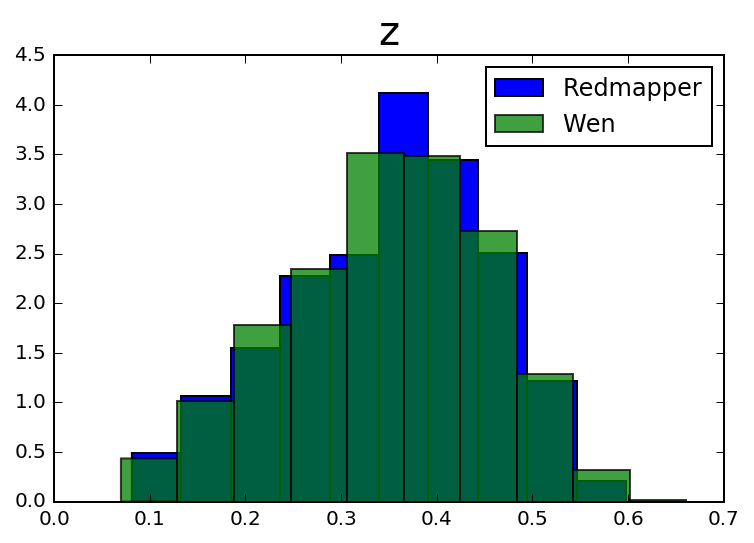

In [105]:
print ' Histogram z - Sky '
ho_z = plt.hist(o_r['Z_LAMBDA'], normed=True, label = 'Redmapper')
ho_z = plt.hist(o_w['zph'], normed=True, label = 'Wen', alpha = 0.75)
plt.title('z', fontsize='20')
plt.legend()

Hist_w - Completeness - Plot
10 11


/Users/lucascoimbra257/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide
/Users/lucascoimbra257/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide
/Users/lucascoimbra257/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


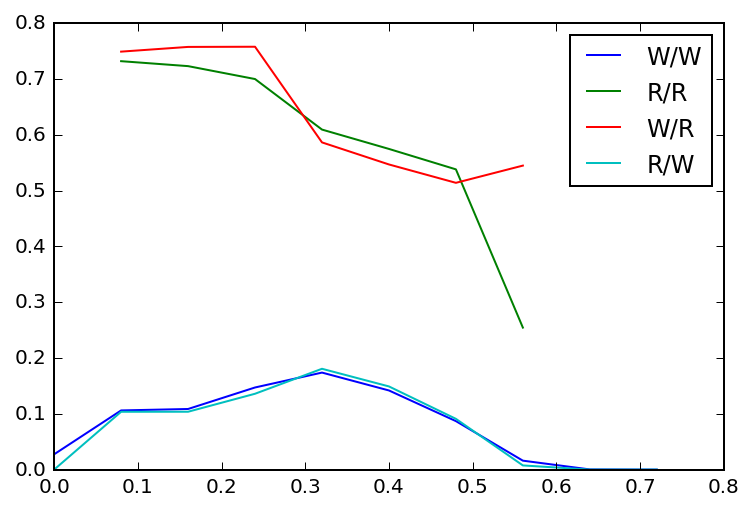

In [106]:
print'Hist_w - Completeness - Plot' 

print len(Hist_w[0]), len(Hist_w[1])
plt.plot(Hist_w[1][:-1], Hist_w_m[0]/Hist_w[0], label = 'W/W')
plt.plot(Hist_w[1][:-1], Hist_r_m[0]/Hist_r[0], label = 'R/R')
plt.plot(Hist_w[1][:-1], Hist_w_m[0]/Hist_r[0], label = 'W/R')
plt.plot(Hist_w[1][:-1], Hist_r_m[0]/Hist_w[0], label = 'R/W')
plt.legend()

Hist_r - Completeness - Plot
10 11


/Users/lucascoimbra257/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide
/Users/lucascoimbra257/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide
/Users/lucascoimbra257/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


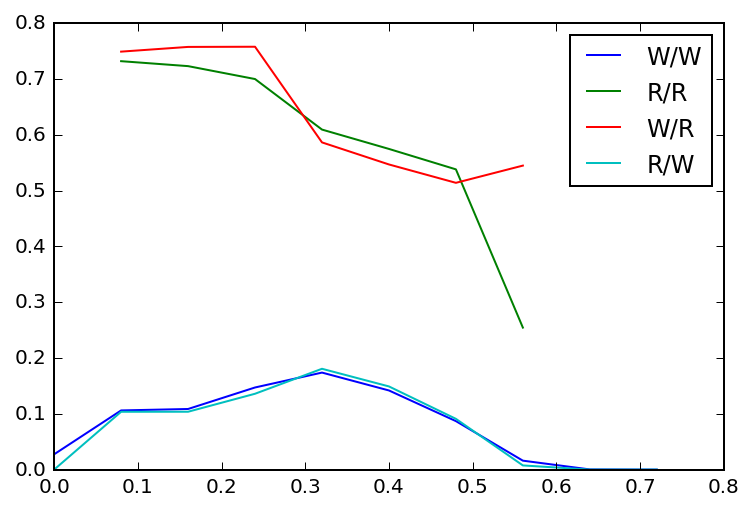

In [107]:
print'Hist_r - Completeness - Plot' 

print len(Hist_r[0]), len(Hist_r[1])
plt.plot(Hist_r[1][:-1], Hist_w_m[0]/Hist_w[0], label = 'W/W')
plt.plot(Hist_r[1][:-1], Hist_r_m[0]/Hist_r[0], label = 'R/R') 
plt.plot(Hist_r[1][:-1], Hist_w_m[0]/Hist_r[0], label = 'W/R')
plt.plot(Hist_r[1][:-1], Hist_r_m[0]/Hist_w[0], label = 'R/W')
plt.legend()

Plot z - Sky 


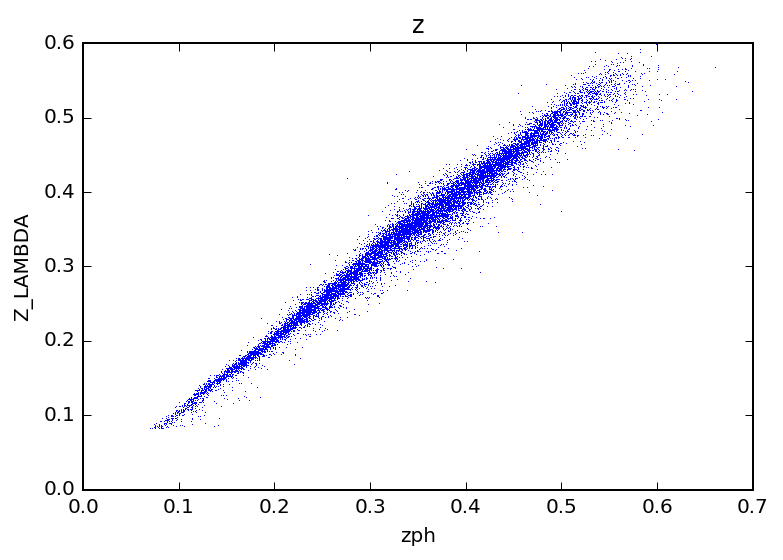

In [108]:
print 'Plot z - Sky '
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(o_w['zph'], o_r['Z_LAMBDA'], 'b,')
plt.xlabel('zph')
plt.ylabel('Z_LAMBDA')
plt.title('z')

Plot (zph) x (z_lambda - zph) - Sky 
Media = 0.00263434476684
Desvio Pdrao = 0.0168272388321


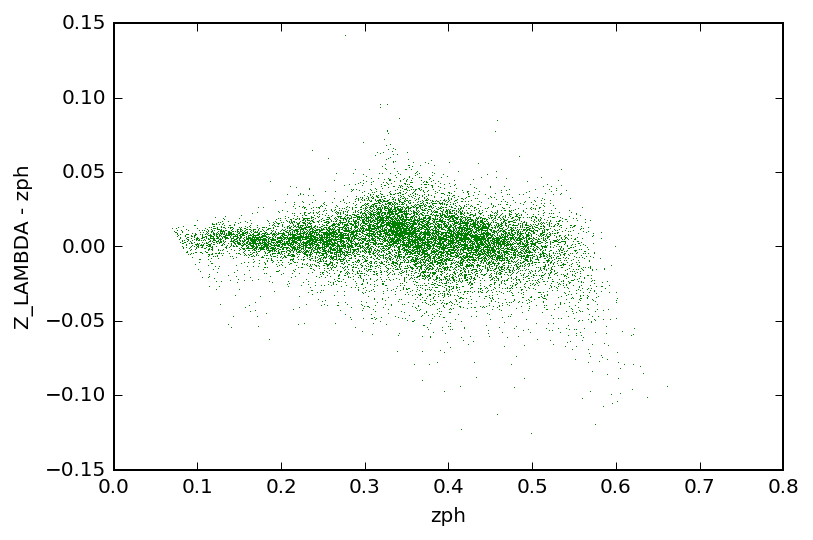

In [109]:
print 'Plot (zph) x (z_lambda - zph) - Sky '
fig = plt.figure(1)
ax = fig.add_subplot(111)
z = o_r['Z_LAMBDA'] - o_w['zph']  
z_m = z
media = z_m.mean()
sigma = z_m.std()
print 'Media =',media
print 'Desvio Pdrao =',sigma
ax.plot (o_w['zph'], z, 'g,')
plt.xlim(0, 0.8)
plt.ylabel('Z_LAMBDA - zph')
plt.xlabel('zph')

In [110]:
print 'Completeness - sky'
Rich_w = w['RL*']
Rich_r = r['LAMBDA']
Rich_w_m = o_w['RL*']
Rich_r_m = o_r ['LAMBDA']
Completeness_rw = (Rich_w_m[0])/(Rich_w[0])
Completeness_rr = (Rich_r_m[0])/(Rich_r[0])
Completeness_rw_r = (Rich_w_m[0]/Rich_r[0])
Completeness_rr_w = (Rich_r_m[0])/(Rich_w[0])
print Completeness_rw, Completeness_rr, Completeness_rw_r, Completeness_rr_w

Completeness - sky
0.247486903582 0.1379 0.102921701671 0.331595624859


Histograma com os valores da Riqueza
Wen = 132684 , Match Wen = 16168 ,Redmapper = 26111 ,Match Redmapper = 16168


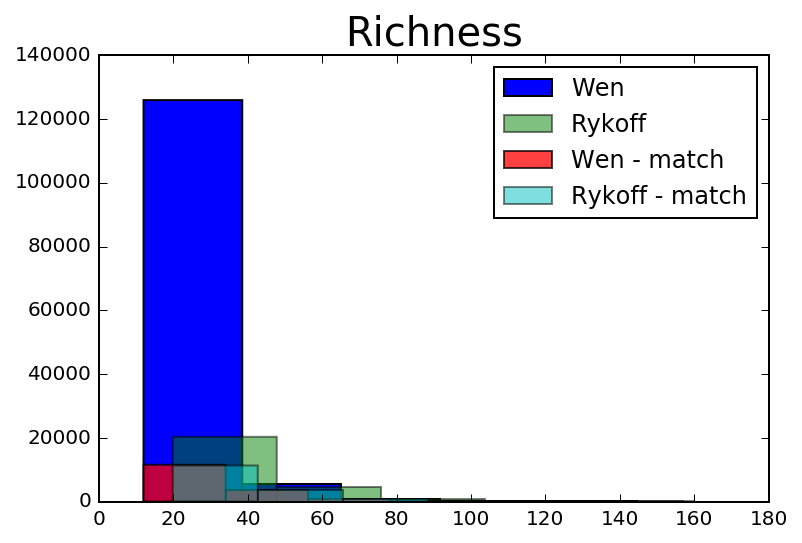

In [111]:
print 'Histograma com os valores da Riqueza'

R_W = len(Rich_w)
R_W_M = len(Rich_w_m)
R_R = len(Rich_r)
R_R_M = len(Rich_r_m)
print 'Wen =', R_W, ', Match Wen =', R_W_M, ',Redmapper =', R_R, ',Match Redmapper =', R_R_M

Hist_rw = plt.hist(Rich_w, label = 'Wen')
Hist_rr = plt.hist(Rich_r, alpha = 0.5, label = 'Rykoff')
Hist_rw_m = plt.hist(Rich_w_m, alpha = 0.75, label = 'Wen - match')
Hist_rr_m = plt.hist(Rich_r_m, alpha = 0.5, label = 'Rykoff - match')

plt.title('Richness', fontsize='20')
plt.xlim(0,180)
plt.legend()

Histogram richness - Sky


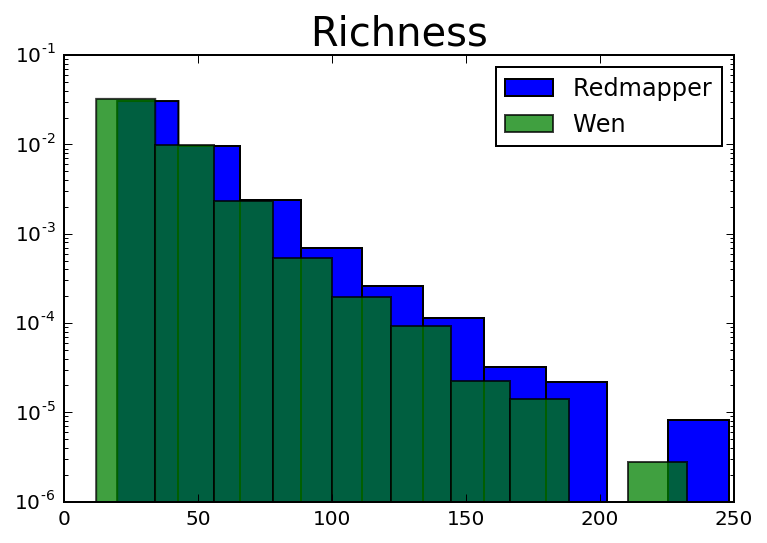

In [112]:
print 'Histogram richness - Sky'
ho_r = plt.hist(o_r['LAMBDA'], normed=True, log=True, label='Redmapper')
ho_r = plt.hist(o_w['RL*'], normed=True, log=True, label='Wen', alpha=0.75)
plt.legend()
plt.title('Richness', fontsize='20')

Hist_w - Completeness - Plot
10 11


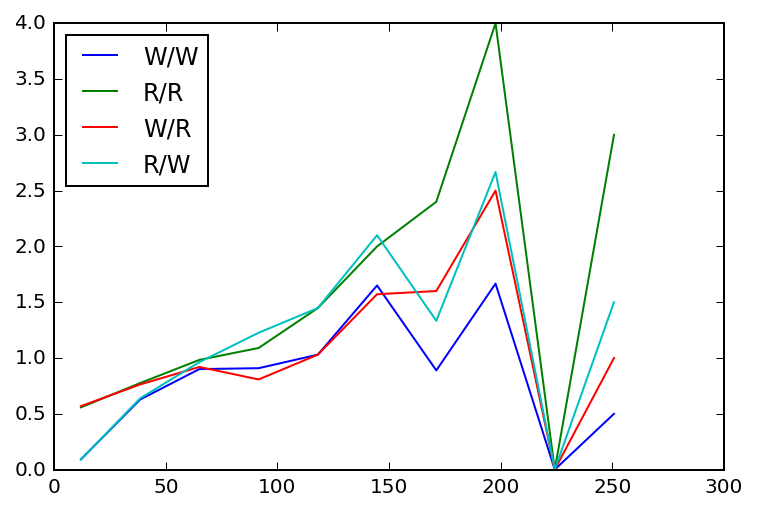

In [113]:
print'Hist_w - Completeness - Plot' 

print len(Hist_rw[0]), len(Hist_rw[1])
plt.plot(Hist_rw[1][:-1], Hist_rw_m[0]/Hist_rw[0], label = 'W/W')
plt.plot(Hist_rw[1][:-1], Hist_rr_m[0]/Hist_rr[0], label = 'R/R')
plt.plot(Hist_rw[1][:-1], Hist_rw_m[0]/Hist_rr[0], label = 'W/R')
plt.plot(Hist_rw[1][:-1], Hist_rr_m[0]/Hist_rw[0], label = 'R/W')
plt.legend(loc = 2)

Hist_r - Completeness - Plot
10 11


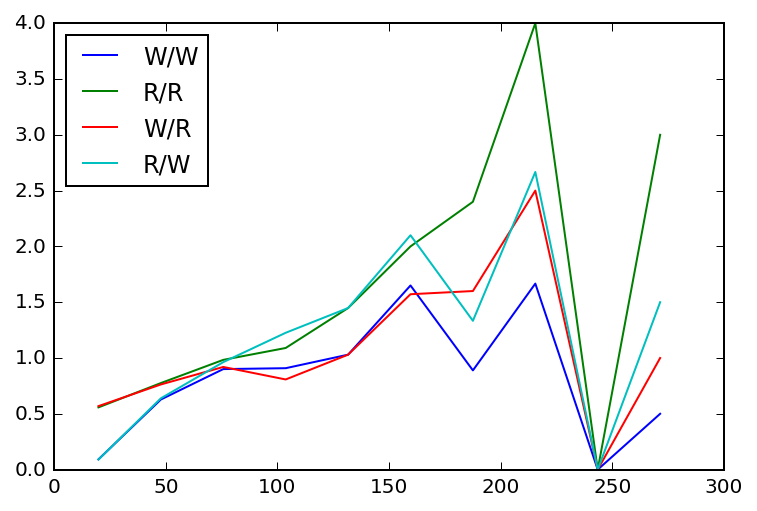

In [114]:
print'Hist_r - Completeness - Plot' 

print len(Hist_rr[0]), len(Hist_rr[1])
plt.plot(Hist_rr[1][:-1], Hist_rw_m[0]/Hist_rw[0], label = 'W/W')
plt.plot(Hist_rr[1][:-1], Hist_rr_m[0]/Hist_rr[0], label = 'R/R') 
plt.plot(Hist_rr[1][:-1], Hist_rw_m[0]/Hist_rr[0], label = 'W/R')
plt.plot(Hist_rr[1][:-1], Hist_rr_m[0]/Hist_rw[0], label = 'R/W')
plt.legend(loc = 2)

Plot richness - Sky


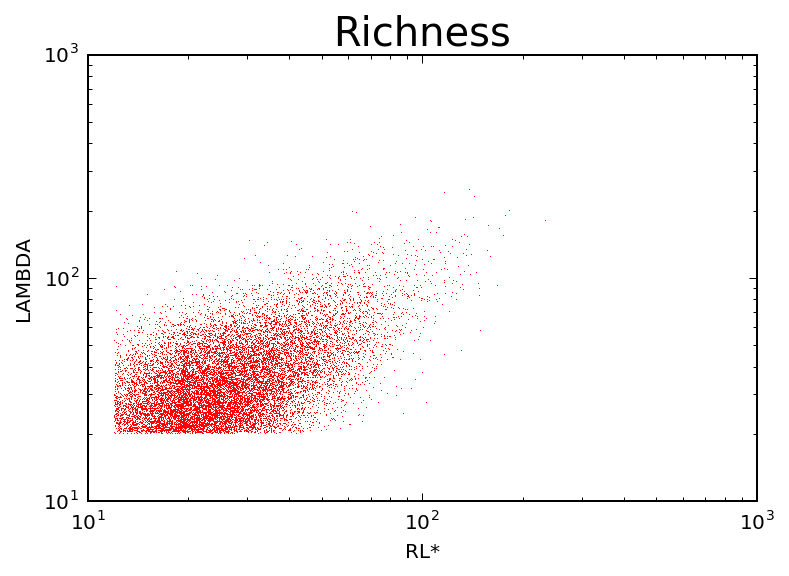

In [115]:
print 'Plot richness - Sky'
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(o_w['RL*'], o_r['LAMBDA'], 'r,')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('RL*')
plt.ylabel('LAMBDA')
plt.title('Richness', fontsize = 20)

In [116]:
idxcw, idxcr, d2d, d3d = cw.search_around_sky(cr, 4*u.arcmin)
#print idxc_w, idxc_r, d2d, d3d 

In [117]:
print("\033[43;30m3D - Code, Histograms, Plots and Macth\033[m")

print 'catalog with values RA, DEC and z'
c_w = SkyCoord(ra = w['RAJ2000']*u.deg, dec = w['DEJ2000']*u.deg, distance = cosmo.comoving_distance(w['zph'])) 
c_r = SkyCoord(ra = r['RA']*u.deg, dec = r['DEC']*u.deg, distance = cosmo.comoving_distance(r['Z_LAMBDA']))

3D - Code, Histograms, Plots and Macth
catalog with values RA, DEC and z


In [118]:
print 'match to catalog 3d'
idwx, d2dw, d3d = c_w.match_to_catalog_3d(c_r) 
print 'Match Wen em relacao ao Redmapper =',len(idwx)
print idwx, d2dw, d3d 

print 'match to catalog 3d'
idrx, d2dr, d3d = c_r.match_to_catalog_3d(c_w) 
print 'Match Wen em relacao ao Redmapper =',len(idrx)
print idrx, d2dr, d3d 

match to catalog 3d
Match Wen em relacao ao Redmapper = 132684
[ 1803  9032 18830 ...,  2468 26004  8176] [u'4d43m43.8962s' u'0d00m00.0182s' u'1d59m21.6947s' ..., u'6d22m59.7905s'
 u'1d16m28.0575s' u'0d20m13.0253s'] [ 45.53540049   6.9589648   71.61914322 ...,  51.57056377  46.46153162
  13.90166084] Mpc
match to catalog 3d
Match Wen em relacao ao Redmapper = 26111
[101460 107605  76974 ...,  65527  48891  38446] [u'1d16m06.0083s' u'0d00m00.0063s' u'0d00m00.0168s' ..., u'0d23m14.6394s'
 u'1d17m58.6335s' u'0d13m31.7554s'] [ 15.65166566  10.31144     13.10023657 ...,  11.55481329  51.6395054
   7.38320118] Mpc


In [119]:
#plt.hist(d2dw, bins=10000)
#plt.xlabel('d2d')
#plt.xlim(0,0.008)
#plt.ylim(0,10)

(0, 10)

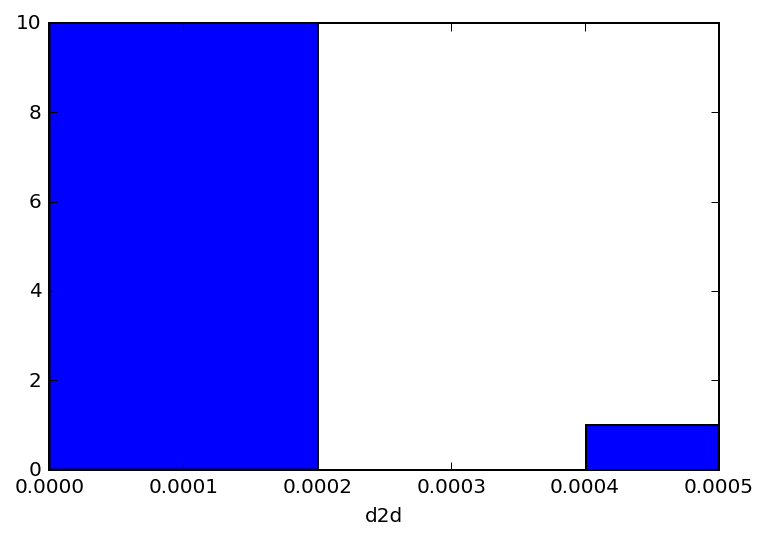

In [120]:
plt.hist(d2dr, bins=30000)
plt.xlabel('d2d')
plt.xlim(0,0.0005)
plt.ylim(0,10)

In [121]:
print len(np.unique(idwx))
print len(np.unique(idrx))
print len(idrx[d2dr<0.0003*u.deg])
print len(idwx[d2dw<0.0003*u.deg])

24430
22256
5276
7812


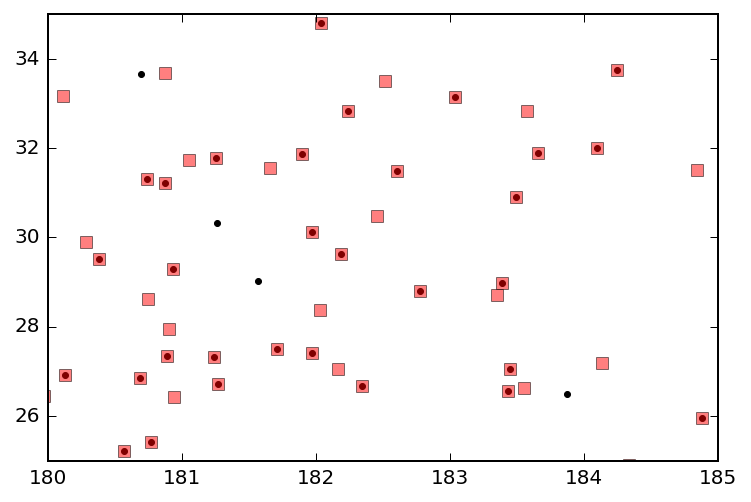

In [122]:
def test_radius(radius=0.004):
    uidrx = idrx[d2dr<radius*u.deg]
    uidwx = idwx[d2dw<radius*u.deg]
    #print uidrx
    #print uidwx
    
    plt.plot(cw.ra[uidrx], cw.dec[uidrx], 'k.')
    plt.plot(cr.ra[uidwx], cr.dec[uidwx], 'rs', alpha=0.5)
    plt.xlim(180, 185)
    plt.ylim(25, 35)
    
interact(test_radius, radius=(0.001, 0.2, 0.01));

In [123]:
print 'Objects around to catalog 3d'
idxc_w, idxc_r, d2d, d3d = c_r.search_around_3d(c_w, 1000*u.kpc) 

Objects around to catalog 3d


(0, 10)

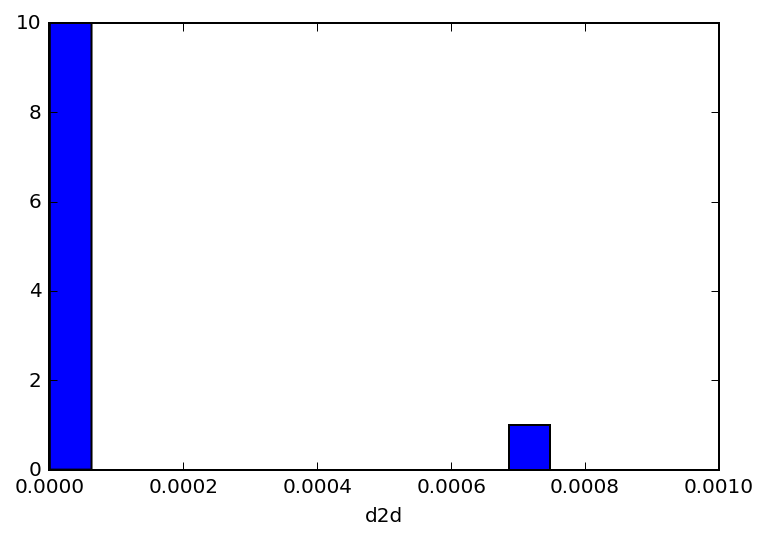

In [124]:
plt.hist(d2d, bins=1000)
plt.xlabel('d2d')
plt.xlim(0,0.001)
plt.ylim(0,10)

In [125]:
print len(np.unique(idxc_w))
print len(np.unique(idxc_r))
print len(idxc_w[d2d<0.0006*u.deg])
print len(idxc_r[d2d<0.0006*u.deg])

obje_w = idxc_w[d2d<0.0006*u.deg]
obje_r = idxc_r[d2d<0.0006*u.deg]

o_we = w[obje_w]
o_re = r[obje_r]

print len(o_we)
print len(o_re)

290
290
250
250
250
250


In [126]:
print 'mean and standard deviation'

delta_ra = o_re['RA'] - o_we['RAJ2000'] 
delta_dec = o_re['DEC'] - o_we['DEJ2000'] 

media_ra = delta_ra.mean()
media_dec = delta_dec.mean()

sigma_ra = delta_ra.std()
sigma_dec = delta_dec.std()

print 'Media RA =',media_ra
print 'Media DEC =',media_dec 
print 'Desvio Padrao RA =',sigma_ra
print 'Desvio Padrao DEC =',sigma_dec

mean and standard deviation
Media RA = 5.52722545329e-07
Media DEC = -9.26294508419e-08
Desvio Padrao RA = 6.19079309624e-06
Desvio Padrao DEC = 2.98336639449e-06


In [127]:
print 'Completeness - sky'
Red_w = w['zph']
Red_r = r['Z_LAMBDA']
Red_we_m = o_we['zph']
Red_re_m = o_re['Z_LAMBDA']
Completeness_w = (Red_we_m[0])/(Red_w[0])
Completeness_r = (Red_re_m[0])/(Red_r[0])
Completeness_we_r = (Red_we_m[0]/Red_r[0])
Completeness_re_w = (Red_re_m[0])/(Red_w[0])
print Completeness_w, Completeness_r, Completeness_we_r, Completeness_re_w

Completeness - sky
2.0125588697 2.70477 2.70376663428 2.01330267279


Histograma com os valores do Redshift
Wen = 132684 , Match Wen = 250 ,Redmapper = 26111 ,Match Redmapper = 250


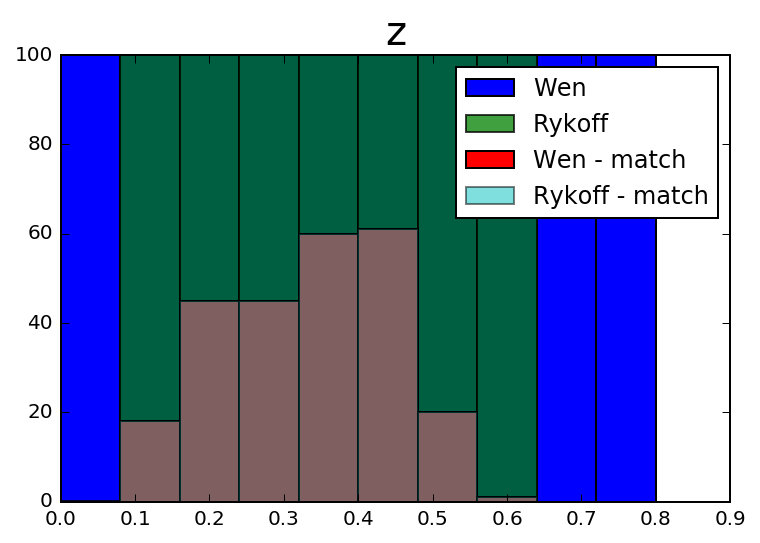

In [128]:
print 'Histograma com os valores do Redshift'

R_W = len(Red_w)
R_W_M = len(Red_we_m)
R_R = len(Red_r)
R_R_M = len(Red_re_m)
print 'Wen =', R_W, ', Match Wen =', R_W_M, ',Redmapper =', R_R, ',Match Redmapper =', R_R_M

Hist_w = plt.hist(Red_w, label = 'Wen', range = [0, 0.8])
Hist_r = plt.hist(Red_r, alpha = 0.75, label = 'Rykoff', range = [0, 0.8])
Hist_we_m = plt.hist(Red_we_m, label = 'Wen - match', range = [0, 0.8])
Hist_re_m = plt.hist(Red_re_m, alpha = 0.5, label = 'Rykoff - match', range = [0, 0.8])

plt.title('z', fontsize='20')
plt.ylim(0,100)
plt.xlim(0, 0.9)
plt.legend()

Histogram z - 3D


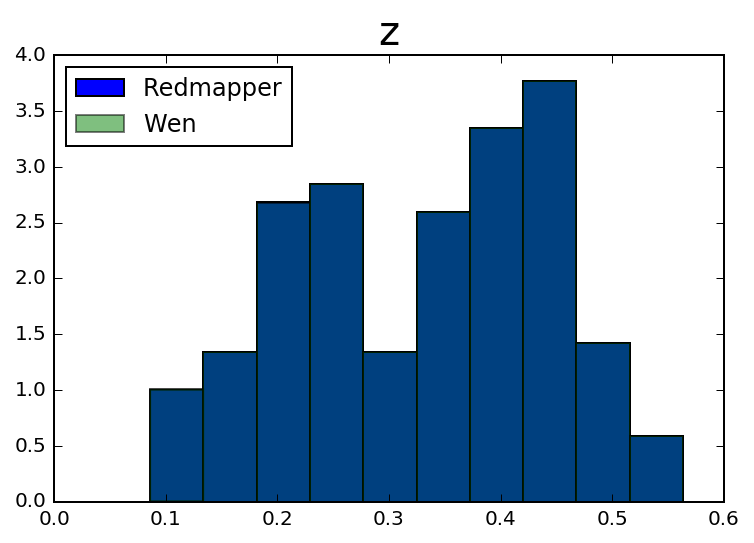

In [129]:
print 'Histogram z - 3D'

ho_z = plt.hist(o_re['Z_LAMBDA'], normed=True, label = 'Redmapper')
ho_z = plt.hist(o_we['zph'], normed=True, label = 'Wen', alpha = 0.5)
plt.legend(loc = 2)
plt.title('z', fontsize='20')

Hist_w - Completeness - Plot
10 11


/Users/lucascoimbra257/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide
/Users/lucascoimbra257/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


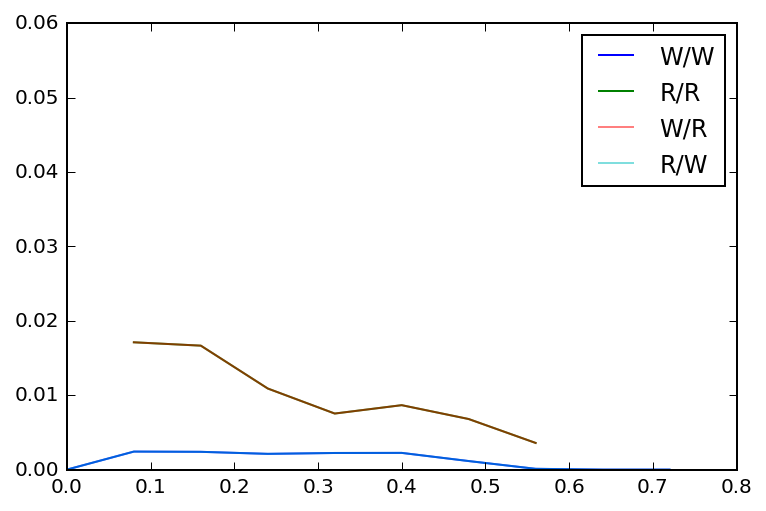

In [130]:
print'Hist_w - Completeness - Plot' 

print len(Hist_w[0]), len(Hist_w[1])
plt.plot(Hist_w[1][:-1], Hist_we_m[0]/Hist_w[0], label = 'W/W')
plt.plot(Hist_w[1][:-1], Hist_re_m[0]/Hist_r[0], label = 'R/R')
plt.plot(Hist_w[1][:-1], Hist_we_m[0]/Hist_r[0], label = 'W/R', alpha = 0.5)
plt.plot(Hist_w[1][:-1], Hist_re_m[0]/Hist_w[0], label = 'R/W', alpha = 0.5)
plt.ylim(0, 0.06)
plt.legend()

Hist_r - Completeness - Plot
10 11


/Users/lucascoimbra257/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide
/Users/lucascoimbra257/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


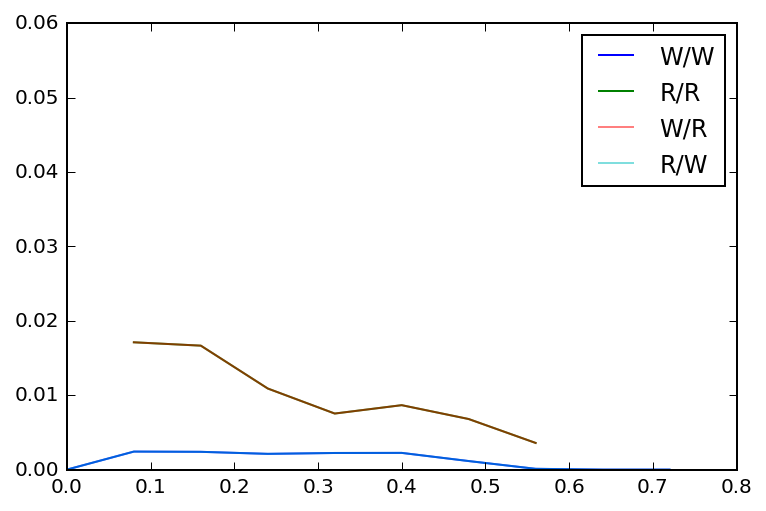

In [131]:
print'Hist_r - Completeness - Plot' 

print len(Hist_r[0]), len(Hist_r[1])
plt.plot(Hist_r[1][:-1], Hist_we_m[0]/Hist_w[0], label = 'W/W')
plt.plot(Hist_r[1][:-1], Hist_re_m[0]/Hist_r[0], label = 'R/R') 
plt.plot(Hist_r[1][:-1], Hist_we_m[0]/Hist_r[0], label = 'W/R', alpha = 0.5)
plt.plot(Hist_r[1][:-1], Hist_re_m[0]/Hist_w[0], label = 'R/W', alpha = 0.5)
plt.ylim(0, 0.06)
plt.legend()

Plot z - 3D


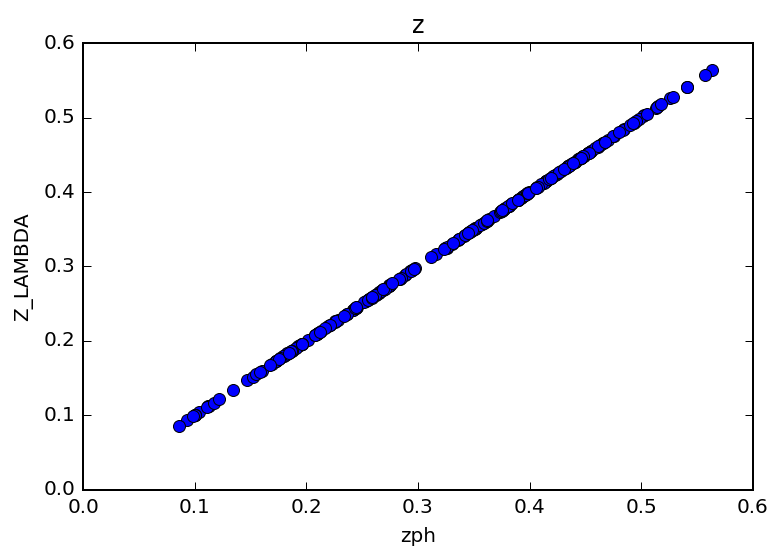

In [132]:
print 'Plot z - 3D'

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(o_we['zph'], o_re['Z_LAMBDA'], 'bo')
plt.xlabel('zph')
plt.ylabel('Z_LAMBDA')
plt.title('z')

Plot (zph) x (z_lambda - zph) - 3D 
Media = 8.53553347587e-06
Desvio Padrao = 0.000150450443233


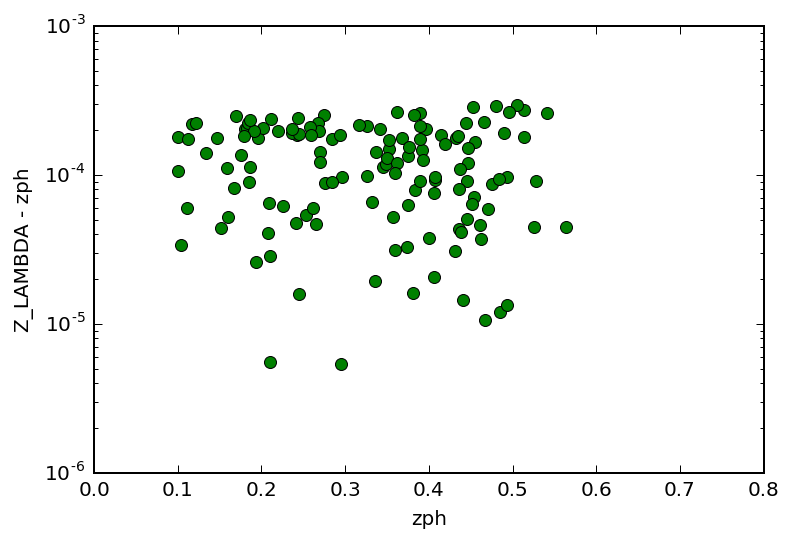

In [133]:
print 'Plot (zph) x (z_lambda - zph) - 3D '

fig = plt.figure(1)
ax = fig.add_subplot(111)
z =  o_we['zph'] - o_re['Z_LAMBDA'] 
z_m = z 
media = z_m.mean()
sigma = z_m.std()
print 'Media =', media
print 'Desvio Padrao =', sigma
ax.plot(o_we['zph'], z, 'go')
plt.ylabel('Z_LAMBDA - zph')
plt.xlabel('zph')
plt.xlim(0, 0.8)
ax.set_yscale('log')

In [134]:
print 'Completeness - sky'
Rich_w = w['RL*']
Rich_r = r['LAMBDA']
Rich_we_m = o_we['RL*']
Rich_re_m = o_re['LAMBDA']
Completeness_rw = (Rich_we_m[0])/(Rich_w[0])
Completeness_rr = (Rich_re_m[0])/(Rich_r[0])
Completeness_rwe_r = (Rich_we_m[0]/Rich_r[0])
Completeness_rre_w = (Rich_re_m[0])/(Rich_w[0])
print Completeness_rw, Completeness_rr, Completeness_rwe_r, Completeness_rre_w

Completeness - sky
0.333427721931 0.17266 0.138661674734 0.4151815668


Histogram richness - 3d


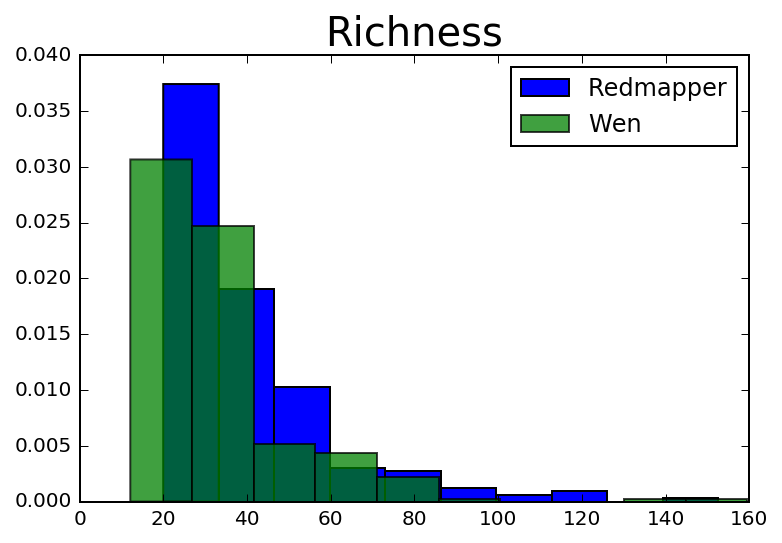

In [135]:
print 'Histogram richness - 3d'
ho_r = plt.hist(o_re['LAMBDA'], normed=True, label = 'Redmapper')
ho_r = plt.hist(o_we['RL*'], normed=True, label = 'Wen', alpha=0.75)
plt.legend()
plt.title('Richness', fontsize='20')

Histograma com os valores do Redshift
Wen = 132684 , Match Wen = 250 ,Redmapper = 26111 ,Match Redmapper = 250


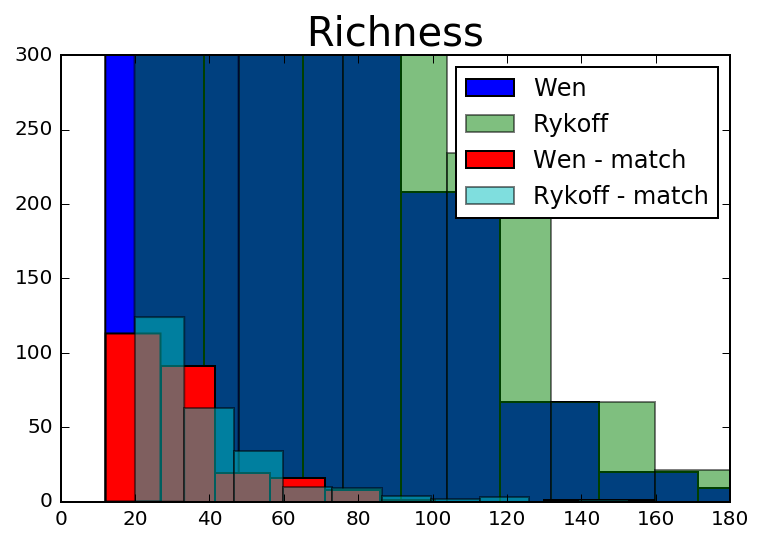

In [136]:
print 'Histograma com os valores do Redshift'

R_W = len(Rich_w)
R_W_M = len(Rich_we_m)
R_R = len(Rich_r)
R_R_M = len(Rich_re_m)
print 'Wen =', R_W, ', Match Wen =', R_W_M, ',Redmapper =', R_R, ',Match Redmapper =', R_R_M

Hist_rw = plt.hist(Rich_w, label = 'Wen')
Hist_rr = plt.hist(Rich_r, alpha = 0.5, label = 'Rykoff')
Hist_rwe_m = plt.hist(Rich_we_m, label = 'Wen - match')
Hist_rre_m = plt.hist(Rich_re_m, alpha = 0.5, label = 'Rykoff - match')

plt.title('Richness', fontsize='20')
plt.xlim(0,180)
plt.ylim(0,300)
plt.legend()

Hist_w - Completeness - Plot
10 11


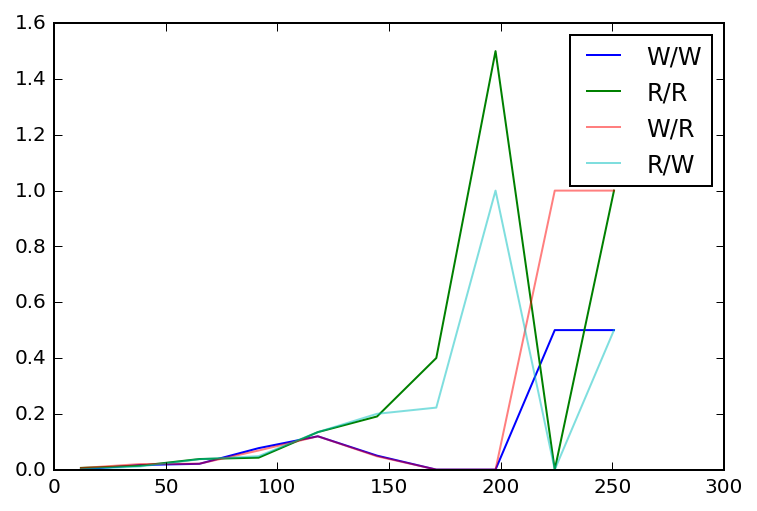

In [137]:
print'Hist_w - Completeness - Plot' 

print len(Hist_rw[0]), len(Hist_rw[1])
plt.plot(Hist_rw[1][:-1], Hist_rwe_m[0]/Hist_rw[0], label = 'W/W')
plt.plot(Hist_rw[1][:-1], Hist_rre_m[0]/Hist_rr[0], label = 'R/R')
plt.plot(Hist_rw[1][:-1], Hist_rwe_m[0]/Hist_rr[0], label = 'W/R', alpha = 0.5)
plt.plot(Hist_rw[1][:-1], Hist_rre_m[0]/Hist_rw[0], label = 'R/W', alpha = 0.5)
plt.legend()

Hist_r - Completeness - Plot
10 11


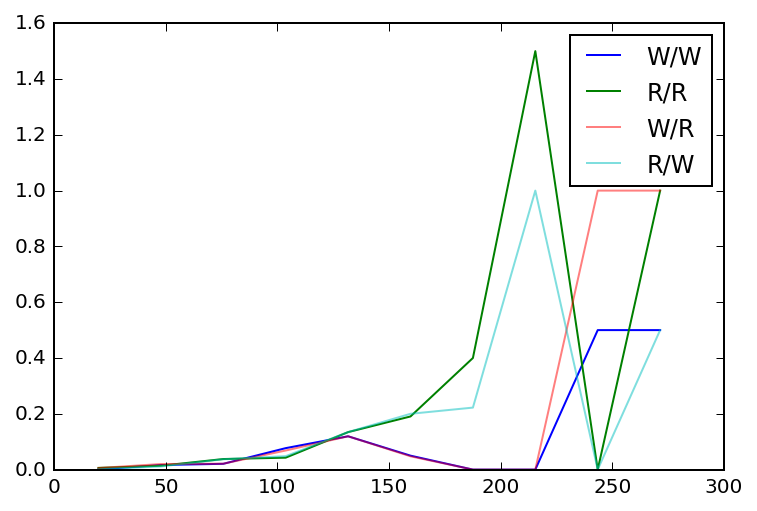

In [138]:
print'Hist_r - Completeness - Plot' 

print len(Hist_rr[0]), len(Hist_rr[1])
plt.plot(Hist_rr[1][:-1], Hist_rwe_m[0]/Hist_rw[0], label = 'W/W')
plt.plot(Hist_rr[1][:-1], Hist_rre_m[0]/Hist_rr[0], label = 'R/R') 
plt.plot(Hist_rr[1][:-1], Hist_rwe_m[0]/Hist_rr[0], label = 'W/R', alpha = 0.5)
plt.plot(Hist_rr[1][:-1], Hist_rre_m[0]/Hist_rw[0], label = 'R/W', alpha = 0.5)
plt.legend()

Plot richness - 3d


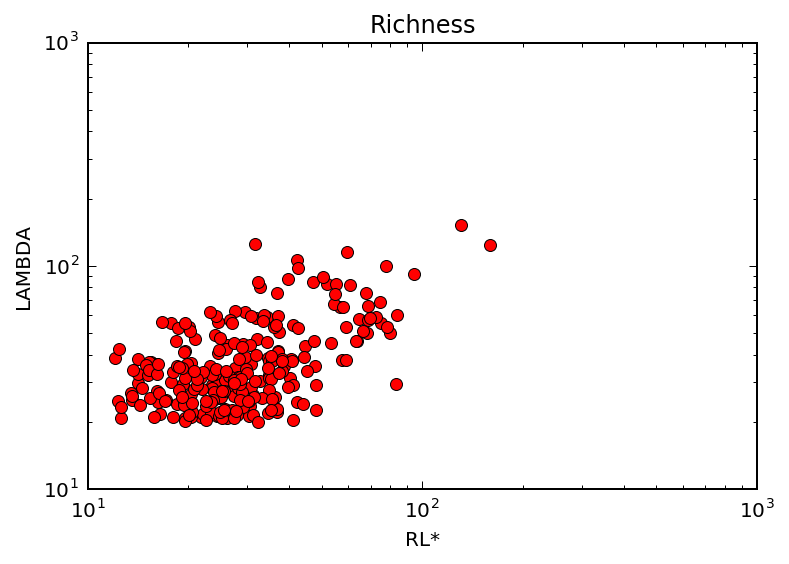

In [139]:
print 'Plot richness - 3d'

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(o_we['RL*'], o_re['LAMBDA'], 'ro')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('RL*')
plt.ylabel('LAMBDA')
plt.title('Richness')

idxc_w, idxc_r, d2d, d3d = c_w.search_around_3d(c_r, 1000*u.kpc)
#print idxc_w, idexc_r, d2d, d3d  

(array([ 26111.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.]), array([  8.10650140e-02,   2.00810650e+01,   4.00810650e+01,
         6.00810650e+01,   8.00810650e+01,   1.00081065e+02,
         1.20081065e+02,   1.40081065e+02,   1.60081065e+02,
         1.80081065e+02,   2.00081065e+02,   2.20081065e+02,
         2.40081065e+02,   2.60081065e+02,   2.80081065e+02]), <a list of 14 Patch objects>)


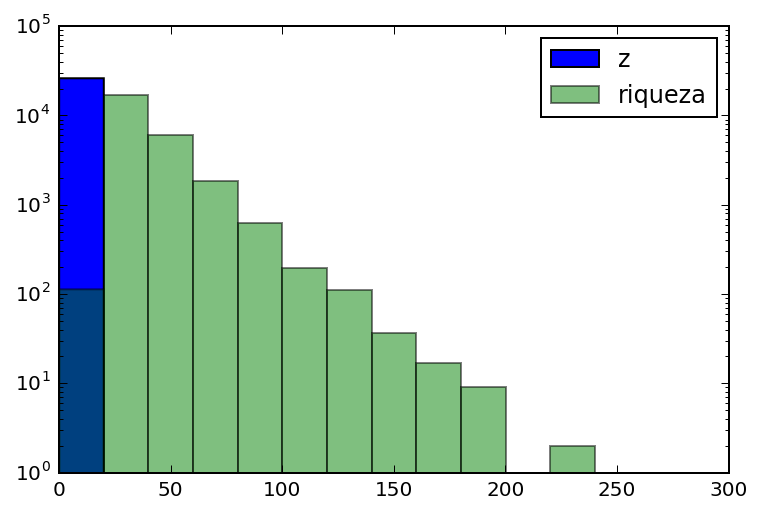

In [140]:
#h = plt.hist(r['Z_LAMBDA'], r['lambda'])
xr = Red_r
yr = Rich_r
bins = np.arange(xr.min(), yr.max(), 20) 
hxr = plt.hist(xr, bins=bins, label = 'z')
hyr = plt.hist(yr, bins=bins, alpha = 0.5, label = 'riqueza')
plt.gca().set_yscale("log")
plt.legend()
print hxr

(array([ 16168.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.]), array([  8.12428966e-02,   2.00812429e+01,   4.00812429e+01,
         6.00812429e+01,   8.00812429e+01,   1.00081243e+02,
         1.20081243e+02,   1.40081243e+02,   1.60081243e+02,
         1.80081243e+02,   2.00081243e+02,   2.20081243e+02,
         2.40081243e+02]), <a list of 12 Patch objects>)


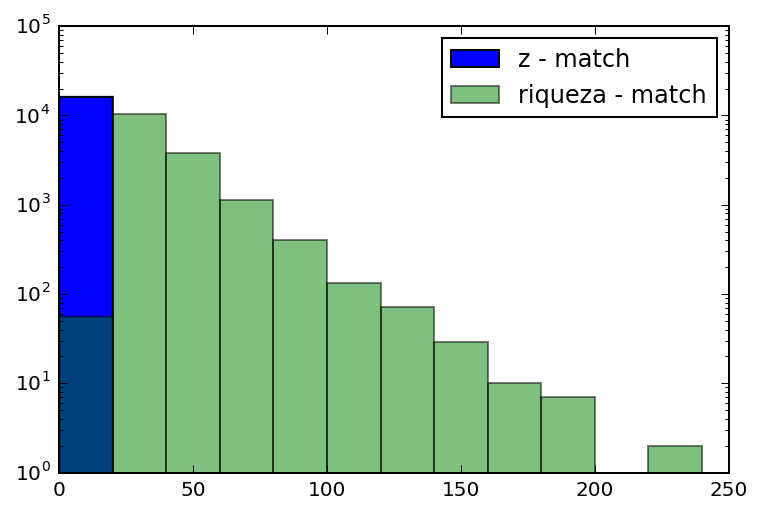

In [141]:
#h = plt.hist(o_r['Z_LAMBDA'], o_r['lambda'] - Sky)
xmr = Red_r_m
ymr = Rich_r_m
bins = np.arange(xmr.min(), ymr.max(), 20) 
hxmr = plt.hist(xmr, bins=bins, label = 'z - match')
hymr = plt.hist(ymr, bins=bins, alpha = 0.5, label = 'riqueza - match')
plt.gca().set_yscale("log")
plt.legend()
print hxmr

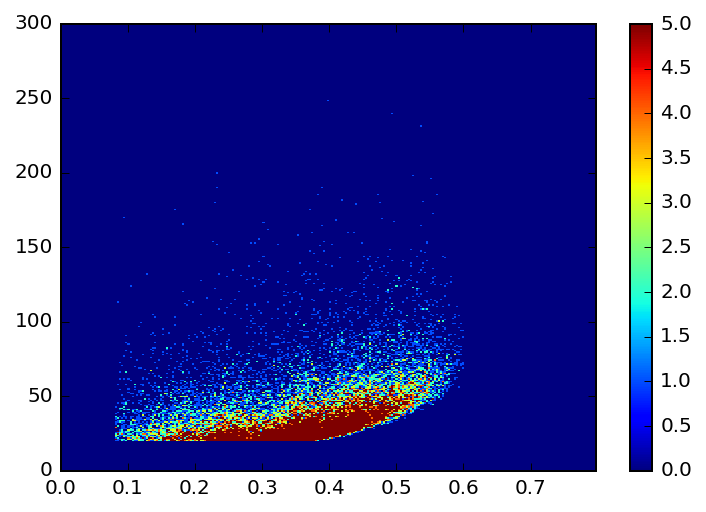

In [142]:
#plt.hexbin(xr, yr, cmap='Reds')
h2dr = plt.hist2d(xr, yr, bins=[np.arange(0, 0.8, .003), np.arange(0, 300, .9)], vmin = 0, vmax = 5)
plt.colorbar()

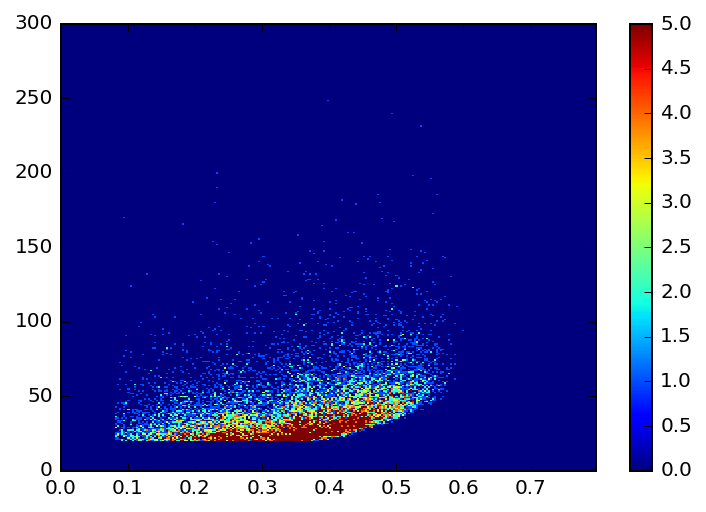

In [143]:
h2dmr = plt.hist2d(xmr, ymr, bins=[np.arange(0, 0.8, .003), np.arange(0, 300, .9)], vmin = 0, vmax = 5)
plt.colorbar()

In [144]:
#print h2dr
#print h2dmr

print h2dr[0].shape, h2dmr[0].shape

(266, 333) (266, 333)


/Users/lucascoimbra257/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


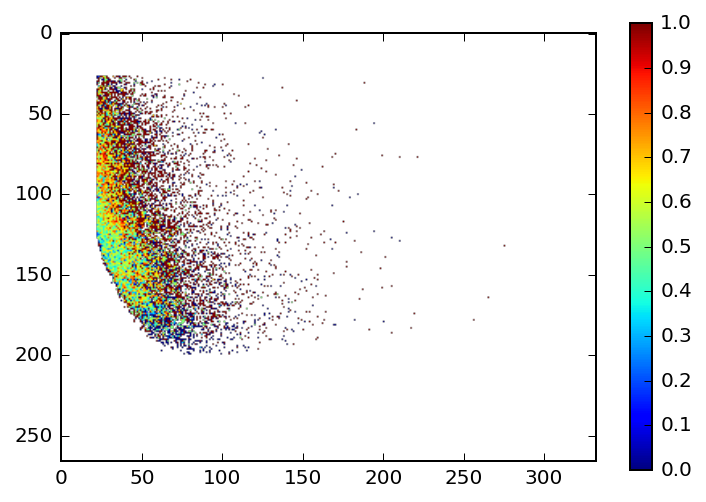

In [145]:
plt.imshow(h2dmr[0]/h2dr[0], clim=(0.0, 1.0))
plt.colorbar()

(array([ 132684.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,       0.]), array([  5.00000000e-02,   2.00500000e+01,   4.00500000e+01,
         6.00500000e+01,   8.00500000e+01,   1.00050000e+02,
         1.20050000e+02,   1.40050000e+02,   1.60050000e+02,
         1.80050000e+02,   2.00050000e+02,   2.20050000e+02,
         2.40050000e+02,   2.60050000e+02]), <a list of 13 Patch objects>)


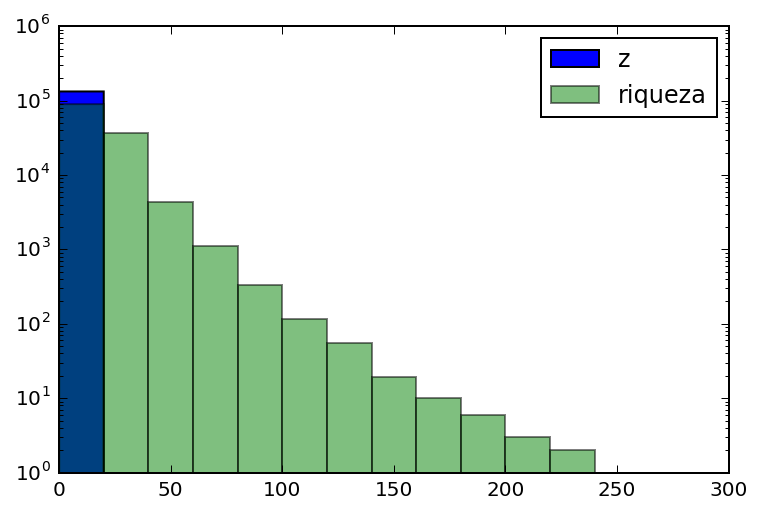

In [146]:
#h = plt.hist(w['zph'], w['RL*'])
xw = Red_w
yw = Rich_w
bins = np.arange(xw.min(), yw.max(), 20) 
hxw = plt.hist(xw, bins=bins, label = 'z')
hyw = plt.hist(yw, bins=bins, alpha = 0.5, label = 'riqueza')
plt.gca().set_yscale("log")
plt.legend()
print hxw

(array([ 16168.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.]), array([  6.98000000e-02,   2.00698000e+01,   4.00698000e+01,
         6.00698000e+01,   8.00698000e+01,   1.00069800e+02,
         1.20069800e+02,   1.40069800e+02,   1.60069800e+02,
         1.80069800e+02,   2.00069800e+02,   2.20069800e+02]), <a list of 11 Patch objects>)


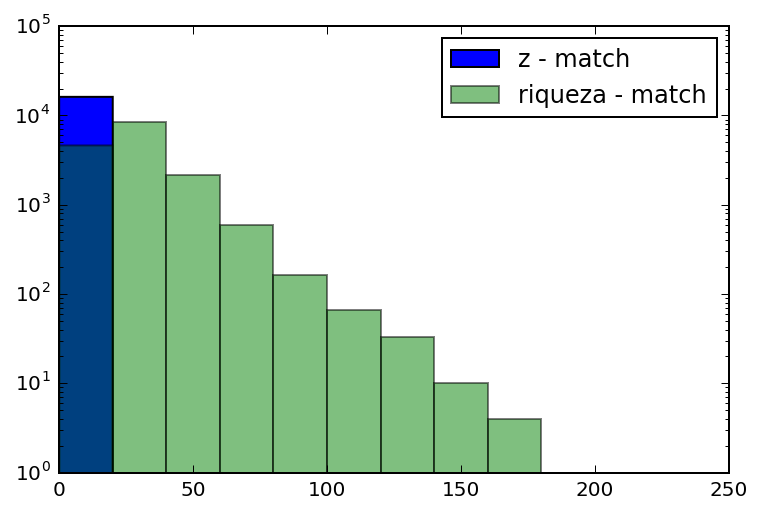

In [147]:
#h = plt.hist(o_w['zph'], o_w['RL*'] - Sky)
xmw = Red_w_m
ymw = Rich_w_m
bins = np.arange(xmw.min(), ymw.max(), 20) 
hxmw = plt.hist(xmw, bins=bins, label = 'z - match')
hymw = plt.hist(ymw, bins=bins, alpha = 0.5, label = 'riqueza - match')
plt.gca().set_yscale("log")
plt.legend()
print hxmw

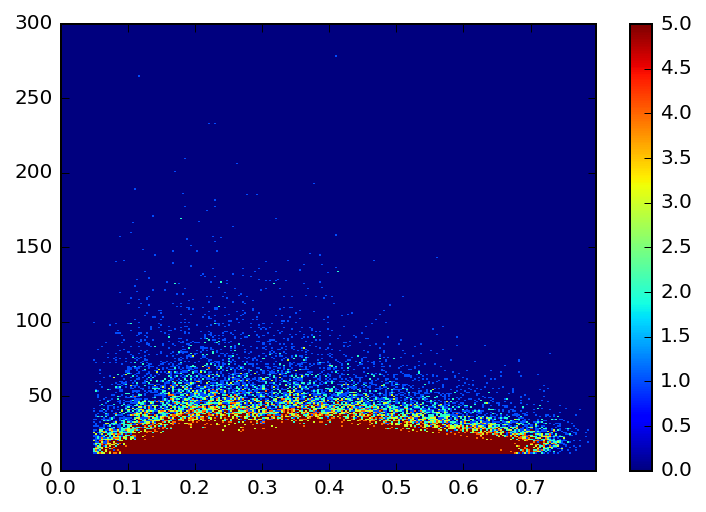

In [148]:
#plt.hexbin(xw, yw, cmap='Reds')
h2dw = plt.hist2d(xw, yw, bins=[np.arange(0, 0.8, .003), np.arange(0, 300, .9)], vmin = 0, vmax = 5)
plt.colorbar()

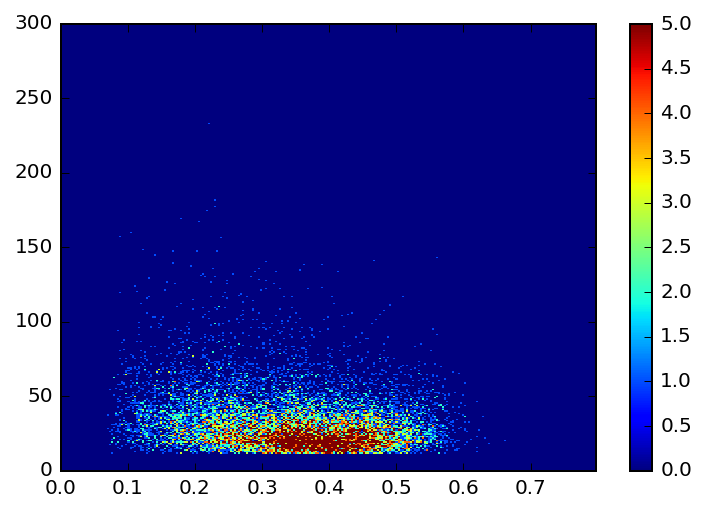

In [149]:
h2dmw = plt.hist2d(xmw, ymw, bins=[np.arange(0, 0.8, .003), np.arange(0, 300, .9)], vmin = 0, vmax = 5)
plt.colorbar()

In [150]:
#print h2dw
#print h2dmw

print h2dw[0].shape, h2dmw[0].shape

(266, 333) (266, 333)


/Users/lucascoimbra257/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


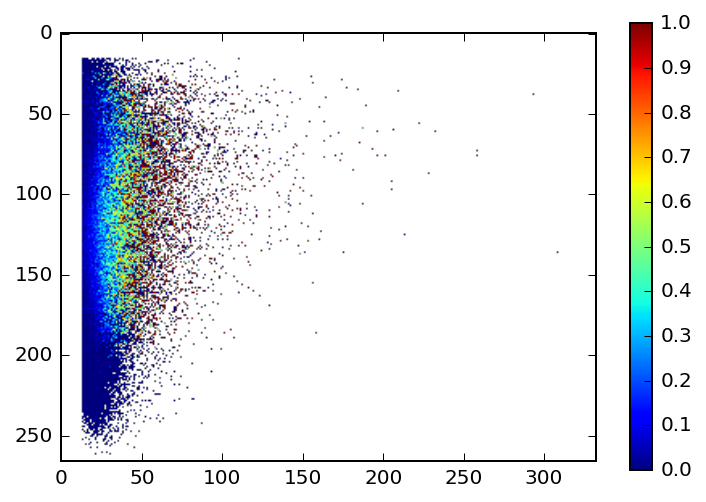

In [151]:
plt.imshow(h2dmw[0]/h2dw[0], clim=(0.0, 1.0))
plt.colorbar()

(array([ 250.,    0.,    0.,    0.,    0.,    0.,    0.]), array([  8.59689340e-02,   2.00859689e+01,   4.00859689e+01,
         6.00859689e+01,   8.00859689e+01,   1.00085969e+02,
         1.20085969e+02,   1.40085969e+02]), <a list of 7 Patch objects>)


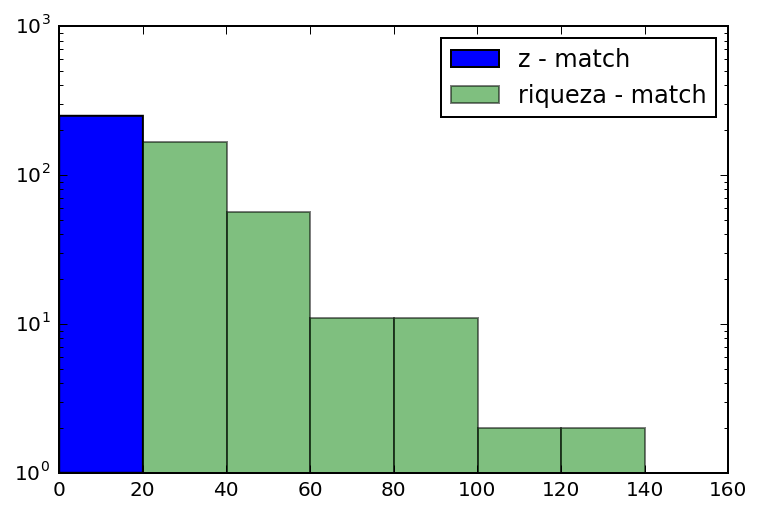

In [152]:
#h = plt.hist(o_r['Z_LAMBDA'], o_r['LAMBDA'] - 3D)
ym_r = Rich_re_m
xm_r = Red_re_m 
bins = np.arange(xm_r.min(), ym_r.max(), 20) 
hxm_r = plt.hist(xm_r, bins=bins, label = 'z - match')
hym_r = plt.hist(ym_r, bins=bins, alpha = 0.5, label = 'riqueza - match')
plt.gca().set_yscale("log")
plt.legend()
print hxm_r

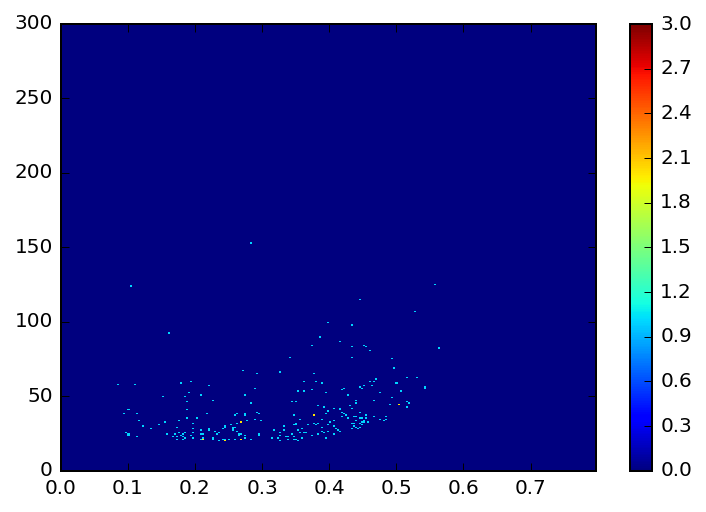

In [153]:
#plt.hexbin(xm_r, ym_r, cmap='Reds')
h2dm_r = plt.hist2d(xm_r, ym_r, bins=[np.arange(0, 0.8, .003), np.arange(0, 300, .9)], vmin = 0, vmax = 3)
plt.colorbar()

In [154]:
#print h2dm_r

print h2dr[0].shape, h2dm_r[0].shape

(266, 333) (266, 333)


/Users/lucascoimbra257/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


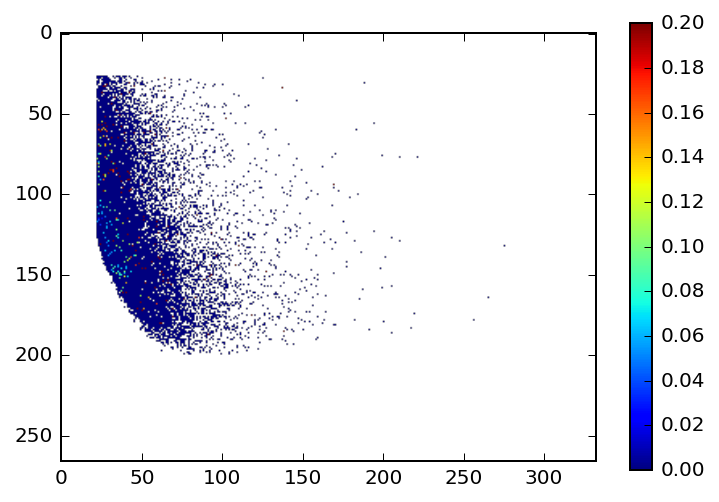

In [155]:
plt.imshow(h2dm_r[0]/h2dr[0], clim=(0.0, 0.2))
plt.colorbar()

(array([ 250.,    0.,    0.,    0.,    0.,    0.,    0.]), array([  8.59000000e-02,   2.00859000e+01,   4.00859000e+01,
         6.00859000e+01,   8.00859000e+01,   1.00085900e+02,
         1.20085900e+02,   1.40085900e+02]), <a list of 7 Patch objects>)


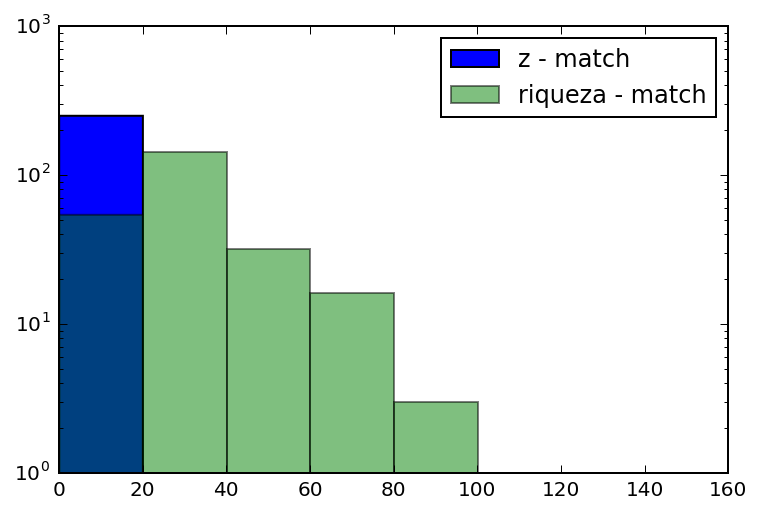

In [156]:
#h = plt.hist(o_w['zph'], o_w['RL*'] - 3D)
ym_w = Rich_we_m
xm_w = Red_we_m 
bins = np.arange(xm_w.min(), ym_w.max(), 20) 
hxm_w = plt.hist(xm_w, bins=bins, label = 'z - match')
hym_w = plt.hist(ym_w, bins=bins, alpha = 0.5, label = 'riqueza - match')
plt.gca().set_yscale("log")
plt.legend()
print hxm_w

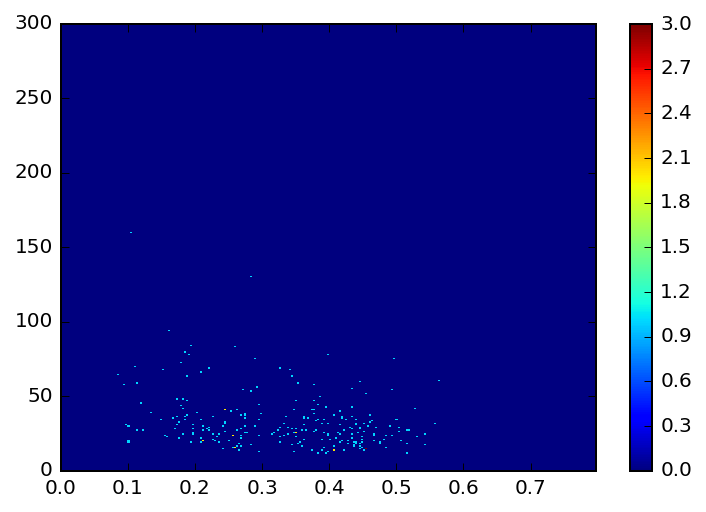

In [157]:
#plt.hexbin(xm_w, ym_w, cmap='Reds')
h2dm_w = plt.hist2d(xm_w, ym_w, bins=[np.arange(0, 0.8, .003), np.arange(0, 300, .9)], vmin = 0, vmax = 3)
plt.colorbar()

In [158]:
#print h2dm_w

print h2dw[0].shape, h2dm_w[0].shape

(266, 333) (266, 333)


/Users/lucascoimbra257/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


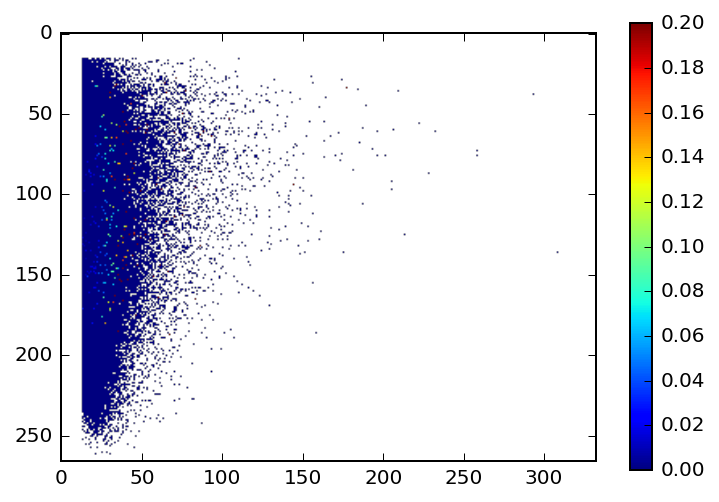

In [159]:
plt.imshow(h2dm_w[0]/h2dw[0], clim=(0.0, 0.2))
plt.colorbar()